<a href="https://colab.research.google.com/github/somilasthana/deeplearningtutorial/blob/master/Tensorflow_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow.feature_column as fc
import os
import sys

import matplotlib.pyplot as plt
from IPython.display import clear_output


In [0]:
tf.enable_eager_execution()

In [0]:
! pip install -q requests
! git clone --depth 1 https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


In [0]:
models_path = os.path.join(os.getcwd(), 'models')
sys.path.append(models_path)

In [0]:
from official.wide_deep import census_dataset
from official.wide_deep import census_main

census_dataset.download("/tmp/census_dataset")

In [0]:
#export PYTHONPATH=${PYTHONPATH}:"$(pwd)/models"
#running from python you need to set the `os.environ` or the subprocess will not see the directory.

if "PYTHONPATH" in os.environ:
  os.environ['PYTHONPATH'] += os.pathsep +  models_path
else:
  os.environ['PYTHONPATH'] = models_path

In [0]:
!python -m official.wide_deep.census_main --help

Train DNN on census income dataset.
flags:

/content/models/official/wide_deep/census_main.py:
  -bs,--batch_size:
    Batch size for training and evaluation. When using multiple gpus, this is
    the
    global batch size for all devices. For example, if the batch size is 32 and
    there are 4 GPUs, each GPU will get 8 examples on each step.
    (default: '40')
    (an integer)
  --[no]clean:
    If set, model_dir will be removed if it exists.
    (default: 'false')
  -dd,--data_dir:
    The location of the input data.
    (default: '/tmp/census_data')
  --[no]download_if_missing:
    Download data to data_dir if it is not already present.
    (default: 'true')
  -ebe,--epochs_between_evals:
    The number of training epochs to run between evaluations.
    (default: '2')
    (an integer)
  -ed,--export_dir:
    If set, a SavedModel serialization of the model will be exported to this
    directory at the end of training. See the README for more details and
    relevant
    links.
  -h

In [0]:
!python -m official.wide_deep.census_main --model_type=wide --train_epochs=2

I0601 03:34:41.757406 140182807984000 estimator.py:201] Using config: {'_model_dir': '/tmp/census_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': device_count {
  key: "GPU"
  value: 0
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7e80bc4da0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
W0601 03:34:41.758492 140182807984000 tf_logging.py:161] 'cpuinfo' not imported. CPU info will not be logged.
2019-06-01 03:34:41.771185: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU F

In [0]:
!ls  /tmp/census_data/

adult.data  adult.test


In [0]:
train_file = "/tmp/census_data/adult.data"
test_file = "/tmp/census_data/adult.test"

In [0]:
import pandas as pd

train_df = pd.read_csv(train_file, header=None, names=census_dataset._CSV_COLUMNS)
test_df = pd.read_csv(test_file, header=None, names=census_dataset._CSV_COLUMNS)


In [0]:
train_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
"""
Build a tf.estimator model, the input data is specified by using an input function (or input_fn). 
This builder function returns a tf.data.Dataset of batches of (features-dict, label) pairs. 
It is not called until it is passed to tf.estimator.Estimator methods such as train and evaluate.

"""

'\nBuild a tf.estimator model, the input data is specified by using an input function (or input_fn). \nThis builder function returns a tf.data.Dataset of batches of (features-dict, label) pairs. \nIt is not called until it is passed to tf.estimator.Estimator methods such as train and evaluate.\n\n'

In [0]:
def easy_input_function(df, label_key, num_epochs, shuffle, batch_size):
  label=df[label_key]
  ds = tf.data.Dataset.from_tensor_slices((dict(df), label))
  
  if shuffle:
    ds = ds.shuffle(10000)
    
  ds = ds.batch(batch_size).repeat(num_epochs)
  return ds

In [0]:
ds = easy_input_function(train_df, label_key="income_bracket", num_epochs=5, shuffle=True, batch_size=10)

for feature_batch, label_batch in ds.take(2):
  print('-'*50)
  print('Feature Keys:', list(feature_batch.keys()))
  print('Age batch:', feature_batch['age'])
  print('Label batch:', label_batch)
  print('-'*50)

--------------------------------------------------
Feature Keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_bracket']
Age batch: tf.Tensor([29 26 24 65 24 38 29 29 30 39], shape=(10,), dtype=int32)
Label batch: tf.Tensor(
[b'<=50K' b'<=50K' b'<=50K' b'>50K' b'<=50K' b'>50K' b'<=50K' b'<=50K'
 b'<=50K' b'<=50K'], shape=(10,), dtype=string)
--------------------------------------------------
--------------------------------------------------
Feature Keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income_bracket']
Age batch: tf.Tensor([49 43 64 63 22 27 51 50 25 74], shape=(10,), dtype=int32)
Label batch: tf.Tensor(
[b'<=50K' b'<=50K' b'<=50K' b'>50K' b'<=50K' b'<=50K' b'>50K' b'>5

In [0]:
import inspect
print(inspect.getsource(census_dataset.input_fn))

def input_fn(data_file, num_epochs, shuffle, batch_size):
  """Generate an input function for the Estimator."""
  assert tf.gfile.Exists(data_file), (
      '%s not found. Please make sure you have run census_dataset.py and '
      'set the --data_dir argument to the correct path.' % data_file)

  def parse_csv(value):
    tf.logging.info('Parsing {}'.format(data_file))
    columns = tf.decode_csv(value, record_defaults=_CSV_COLUMN_DEFAULTS)
    features = dict(zip(_CSV_COLUMNS, columns))
    labels = features.pop('income_bracket')
    classes = tf.equal(labels, '>50K')  # binary classification
    return features, classes

  # Extract lines from input files using the Dataset API.
  dataset = tf.data.TextLineDataset(data_file)

  if shuffle:
    dataset = dataset.shuffle(buffer_size=_NUM_EXAMPLES['train'])

  dataset = dataset.map(parse_csv, num_parallel_calls=5)

  # We call repeat after shuffling, rather than before, to prevent separate
  # epochs from blending together.
  dataset = 

In [0]:
ds = census_dataset.input_fn(train_file, num_epochs=5, shuffle=True, batch_size=10)

for feature_batch, label_batch in ds.take(1):
  print('Feature keys:', list(feature_batch.keys())[:5])
  print()
  print('Age batch   :', feature_batch['age'])
  print()
  print('Label batch :', label_batch )

INFO:tensorflow:Parsing /tmp/census_data/adult.data


I0601 03:35:02.544155 140070466692992 census_dataset.py:167] Parsing /tmp/census_data/adult.data


Feature keys: ['age', 'workclass', 'fnlwgt', 'education', 'education_num']

Age batch   : tf.Tensor([42 30 32 37 44 50 48 36 28 29], shape=(10,), dtype=int32)

Label batch : tf.Tensor([False  True False  True  True  True False False False False], shape=(10,), dtype=bool)


In [0]:
import functools
train_inpf = functools.partial(
    census_dataset.input_fn,
    train_file,
    num_epochs=2,
    shuffle=True,
    batch_size=64
)

test_inpf = functools.partial(
    census_dataset.input_fn,
    test_file,
    num_epochs=1,
    shuffle=True,
    batch_size=64
)

In [0]:
age = fc.numeric_column('age')

In [0]:
age

NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)

In [0]:
fc.input_layer(feature_batch, [age]).numpy()
"""
array([[64.],
       [90.],
       [20.],
       [61.],
       [22.],
       [25.],
       [19.],
       [36.],
       [28.],
       [21.]], dtype=float32)
"""

'\narray([[64.],\n       [90.],\n       [20.],\n       [61.],\n       [22.],\n       [25.],\n       [19.],\n       [36.],\n       [28.],\n       [21.]], dtype=float32)\n'

In [0]:
classifier = tf.estimator.LinearClassifier(feature_columns=[age])
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)

clear_output()


In [0]:
result

{'accuracy': 0.74504024,
 'accuracy_baseline': 0.76377374,
 'auc': 0.67835975,
 'auc_precision_recall': 0.3113923,
 'average_loss': 0.5260387,
 'global_step': 1018,
 'label/mean': 0.23622628,
 'loss': 33.586025,
 'precision': 0.1762208,
 'prediction/mean': 0.27290595,
 'recall': 0.021580864}

In [0]:
education_num = tf.feature_column.numeric_column('education_num')
capital_gain =  tf.feature_column.numeric_column('capital_gain')
capital_loss   =  tf.feature_column.numeric_column('capital_loss')
hours_per_week =  tf.feature_column.numeric_column('hours_per_week')

my_numeric_columns = [age, education_num, capital_gain, capital_loss, hours_per_week]

fc.input_layer(feature_batch, my_numeric_columns).numpy()

array([[4.2000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+01, 4.0000e+01],
       [3.0000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+01, 5.0000e+01],
       [3.2000e+01, 0.0000e+00, 0.0000e+00, 1.3000e+01, 4.0000e+01],
       [3.7000e+01, 1.5024e+04, 0.0000e+00, 9.0000e+00, 4.5000e+01],
       [4.4000e+01, 0.0000e+00, 0.0000e+00, 1.3000e+01, 4.0000e+01],
       [5.0000e+01, 0.0000e+00, 0.0000e+00, 9.0000e+00, 4.0000e+01],
       [4.8000e+01, 0.0000e+00, 0.0000e+00, 9.0000e+00, 4.0000e+01],
       [3.6000e+01, 5.0130e+03, 0.0000e+00, 9.0000e+00, 4.0000e+01],
       [2.8000e+01, 2.1760e+03, 0.0000e+00, 1.5000e+01, 4.0000e+01],
       [2.9000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+01, 4.0000e+01]],
      dtype=float32)

In [0]:
fc.input_layer(feature_batch, [education_num]).numpy()


array([[10.],
       [10.],
       [13.],
       [ 9.],
       [13.],
       [ 9.],
       [ 9.],
       [ 9.],
       [15.],
       [10.]], dtype=float32)

In [0]:
classifier = tf.estimator.LinearClassifier(feature_columns=my_numeric_columns)
classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)
clear_output()
result

{'accuracy': 0.78250724,
 'accuracy_baseline': 0.76377374,
 'auc': 0.717053,
 'auc_precision_recall': 0.5145856,
 'average_loss': 3.4181757,
 'global_step': 1018,
 'label/mean': 0.23622628,
 'loss': 218.24048,
 'precision': 0.61526835,
 'prediction/mean': 0.24906935,
 'recall': 0.21164846}

In [0]:
relationship = fc.categorical_column_with_vocabulary_list(
    'relationship',
    ['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
)

In [0]:
fc.input_layer(feature_batch, [age, fc.indicator_column(relationship)]).numpy()
"""
array([[64.,  0.,  1.,  0.,  0.,  0.,  0.],
       [90.,  1.,  0.,  0.,  0.,  0.,  0.],
       [20.,  0.,  0.,  0.,  1.,  0.,  0.],
       [61.,  1.,  0.,  0.,  0.,  0.,  0.],
       [22.,  0.,  0.,  0.,  1.,  0.,  0.],
       [25.,  0.,  0.,  0.,  1.,  0.,  0.],
       [19.,  0.,  0.,  0.,  1.,  0.,  0.],
       [36.,  0.,  1.,  0.,  0.,  0.,  0.],
       [28.,  0.,  0.,  0.,  0.,  0.,  1.],
       [21.,  0.,  0.,  0.,  1.,  0.,  0.]], dtype=float32)>

"""
clear_output()

In [0]:
occupation = tf.feature_column.categorical_column_with_hash_bucket(
    'occupation',
    hash_bucket_size=1000
)

In [0]:
for item in feature_batch['occupation'].numpy():
  print(item.decode())

Adm-clerical
Tech-support
Exec-managerial
Craft-repair
Other-service
Transport-moving
Exec-managerial
Craft-repair
Prof-specialty
Exec-managerial


In [0]:
occupation_result = fc.input_layer(feature_batch, [fc.indicator_column(occupation)])
occupation_result.shape
"""TensorShape([Dimension(10), Dimension(1000)])"""
clear_output()

In [0]:
tf.argmax(occupation_result, axis=1).numpy()

array([ 96, 413, 800, 466, 527, 420, 800, 466, 979, 800])

In [0]:
education = tf.feature_column.categorical_column_with_vocabulary_list(
    'education',
    [
        'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
        'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
        '5th-6th', '10th', '1st-4th', 'Preschool', '12th'
    ]
)

marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
    'marital_status',
    [
        'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
        'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'
    ]
)

workclass = tf.feature_column.categorical_column_with_vocabulary_list(
    'workclass',
    [
        'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
        'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'
    ]
)

In [0]:
my_categorical_column = [relationship, occupation, education, marital_status, workclass]

In [0]:
classifier = tf.estimator.LinearClassifier(
    feature_columns=my_numeric_columns + my_categorical_column
)

classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)
clear_output()
result

{'accuracy': 0.8368036,
 'accuracy_baseline': 0.76377374,
 'auc': 0.8826973,
 'auc_precision_recall': 0.6945382,
 'average_loss': 0.36487582,
 'global_step': 1018,
 'label/mean': 0.23622628,
 'loss': 23.29625,
 'precision': 0.6797702,
 'prediction/mean': 0.2304947,
 'recall': 0.58450335}

Derived feature columns

Sometimes the relationship between a continuous feature and the label is not linear.

With such exploratory continuous variable one can learn only 3 possible relation when correlated with target or response variable.

These 3 relations are:

1. exploratory variable increases so does response variable. ( or decrease)

2. No relation

Bucketization is a process of dividing the entire range of a continuous feature into a set of consecutive buckets, and then converting the original numerical feature into a bucket ID (as a categorical feature) depending on which bucket that value falls into.

In [0]:
age_bucket = tf.feature_column.bucketized_column(
    age,
    boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65]
)

In [0]:
fc.input_layer(feature_batch, [age, age_bucket]).numpy()
"""
array([[64.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [90.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [20.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [22.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [25.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [19.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [36.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [28.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [21.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],
      dtype=float32)

"""
clear_output()

Complex Relation

Relation between variables

In [0]:
education_x_occupation = tf.feature_column.crossed_column(
    ['education', 'occupation'],
    hash_bucket_size=1000
)

age_bucket_x_education_x_occupation = tf.feature_column.crossed_column(
    [age_bucket, 'education', 'occupation'],
    hash_bucket_size=1000
)

In [0]:
crossed_column = [education_x_occupation, age_bucket_x_education_x_occupation]

In [0]:
classifier = tf.estimator.LinearClassifier(
    feature_columns=my_numeric_columns + my_categorical_column + crossed_column
)

classifier.train(train_inpf)
result = classifier.evaluate(test_inpf)
clear_output()
result

{'accuracy': 0.81635034,
 'accuracy_baseline': 0.76377374,
 'auc': 0.86154956,
 'auc_precision_recall': 0.62940717,
 'average_loss': 2.831425,
 'global_step': 1018,
 'label/mean': 0.23622628,
 'loss': 180.77815,
 'precision': 0.60393393,
 'prediction/mean': 0.27527002,
 'recall': 0.64664584}

In [0]:
import numpy as np

In [0]:
predict_df = test_df[:20].copy()

In [0]:
pred_iter = classifier.predict(
    lambda: easy_input_function(predict_df, label_key='income_bracket', num_epochs=1, shuffle=False, batch_size=10)
)

classes = np.array(['<=50K', '>50K'])

pred_class_id = []

for pred_dict in pred_iter:
  pred_class_id.append(pred_dict['class_ids'])
  
predict_df['predict_class'] = classes[np.array(pred_class_id)]

predict_df['correct'] = predict_df['predict_class'] == predict_df['income_bracket']

clear_output()

predict_df[['income_bracket', 'predict_class', 'correct']]

,income_bracket,predict_class,correct
0,<=50K,<=50K,True
1,<=50K,<=50K,True
2,>50K,<=50K,False
3,>50K,>50K,True
4,<=50K,<=50K,True
5,<=50K,<=50K,True
6,<=50K,<=50K,True
7,>50K,>50K,True
8,<=50K,<=50K,True
9,<=50K,<=50K,True


In [173]:
model_l1 = tf.estimator.LinearClassifier(
    feature_columns=my_numeric_columns + my_categorical_column + crossed_column,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=10.0,
        l2_regularization_strength=0.0
    )
)

INFO:tensorflow:Using default config.


I0601 05:08:43.540475 140070466692992 estimator.py:1739] Using default config.


W0601 05:08:43.543405 140070466692992 estimator.py:1760] Using temporary folder as model directory: /tmp/tmp7zzyonc_


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7zzyonc_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f64405deb00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0601 05:08:43.555969 140070466692992 estimator.py:201] Using config: {'_model_dir': '/tmp/tmp7zzyonc_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f64405deb00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [174]:
model_l1.train(train_inpf)
results= model_l1.evaluate(test_inpf)
clear_output()
results

{'accuracy': 0.8180087,
 'accuracy_baseline': 0.76377374,
 'auc': 0.87812084,
 'auc_precision_recall': 0.66603696,
 'average_loss': 0.6908714,
 'global_step': 1018,
 'label/mean': 0.23622628,
 'loss': 44.110107,
 'precision': 0.5931238,
 'prediction/mean': 0.3263987,
 'recall': 0.73114926}

In [0]:
model_l2 = tf.estimator.LinearClassifier(
    feature_columns=my_numeric_columns + my_categorical_column + crossed_column,
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=0.0,
        l2_regularization_strength=10.0
    )
)

INFO:tensorflow:Using default config.


I0601 04:46:11.276980 140070466692992 estimator.py:1739] Using default config.


W0601 04:46:11.281352 140070466692992 estimator.py:1760] Using temporary folder as model directory: /tmp/tmpn34lblia


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpn34lblia', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f64405de7f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


I0601 04:46:11.285557 140070466692992 estimator.py:201] Using config: {'_model_dir': '/tmp/tmpn34lblia', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f64405de7f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
model_l2.train(train_inpf)
results = model_l2.evaluate(test_inpf)
clear_output()
results

{'accuracy': 0.8257478,
 'accuracy_baseline': 0.76377374,
 'auc': 0.87624353,
 'auc_precision_recall': 0.65829647,
 'average_loss': 0.71967185,
 'global_step': 1018,
 'label/mean': 0.23622628,
 'loss': 45.948933,
 'precision': 0.6389424,
 'prediction/mean': 0.2694755,
 'recall': 0.60322416}

In [0]:
model = model_l2

In [0]:
# Get Weight Details
weight_names = [
    name for name in model.get_variable_names() if "linear_model" in name and "Ftrl" not in name
]
weight_names


['linear/linear_model/age/weights',
 'linear/linear_model/age_bucketized_X_education_X_occupation/weights',
 'linear/linear_model/bias_weights',
 'linear/linear_model/capital_gain/weights',
 'linear/linear_model/capital_loss/weights',
 'linear/linear_model/education/weights',
 'linear/linear_model/education_X_occupation/weights',
 'linear/linear_model/education_num/weights',
 'linear/linear_model/hours_per_week/weights',
 'linear/linear_model/marital_status/weights',
 'linear/linear_model/occupation/weights',
 'linear/linear_model/relationship/weights',
 'linear/linear_model/workclass/weights']

In [0]:
weight_values = [model.get_variable_value(name) for name in weight_names]
weights_flat = np.concatenate([i.flatten() for i in weight_values], axis=0)

In [0]:
weight_mask = weights_flat != 0

In [168]:
weights_flat[weight_mask]


array([-0.00166951, -0.13950893,  0.01375201, ...,  0.3181599 ,
       -0.18576285, -0.02153957], dtype=float32)

In [0]:
def get_flat_weights(model):
  weight_names = [
      name for name in model.get_variable_names()
      if "linear_model" in name and "Ftrl" not in name]

  weight_values = [model.get_variable_value(name) for name in weight_names]

  weights_flat = np.concatenate([item.flatten() for item in weight_values], axis=0)

  return weights_flat

weights_flat = get_flat_weights(classifier)
weights_flat_l1 = get_flat_weights(model_l1)
weights_flat_l2 = get_flat_weights(model_l2)


In [0]:
weight_mask = weights_flat != 0

weights_base = weights_flat[weight_mask]
weights_l1 = weights_flat_l1[weight_mask]
weights_l2 = weights_flat_l2[weight_mask]

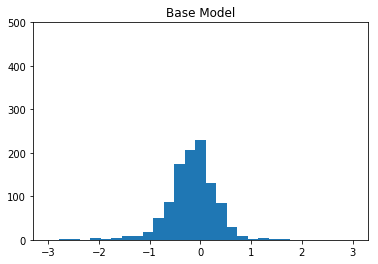

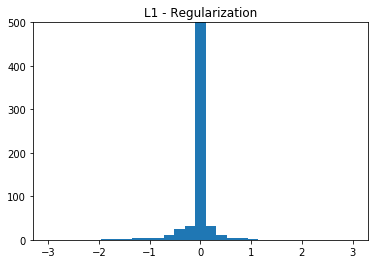

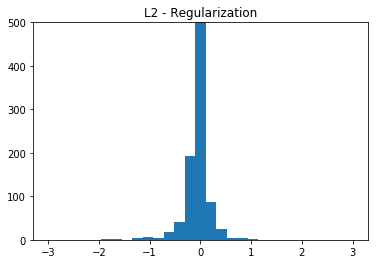

In [177]:
plt.figure()
_ = plt.hist(weights_base, bins=np.linspace(-3,3,30))
plt.title('Base Model')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l1, bins=np.linspace(-3,3,30))
plt.title('L1 - Regularization')
plt.ylim([0,500])

plt.figure()
_ = plt.hist(weights_l2, bins=np.linspace(-3,3,30))
plt.title('L2 - Regularization')
_=plt.ylim([0,500])
